In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [7]:
train = pd.read_csv('data\\twitter_training.csv',header=None)
validation = pd.read_csv('data\\twitter_validation.csv',header=None)
train.columns=['Tweet ID','Entity','Sentiment','Tweet Content']
validation.columns=['Tweet ID','Entity','Sentiment','Tweet Content']
#print("Training DataSet: \n")
train = train.sample(10000)
#display(train.head())
#print("Validation DataSet: \n")
#validation = validation.sample(1000)
#display(validation.head())


In [5]:
df = train[['Tweet Content','Sentiment']]
df = df.rename(columns= {'Tweet Content' : 'Comment', 'Sentiment' : 'Emotion'})
df.head()


,Comment,Emotion
14076,I am freddy and i despise dota 2 - Casey,Negative
25641,No skull and bones no beyond good & evil 2... ...,Positive
34103,This is literally stupid a company that’s wort...,Negative
19320,Team JerseyBoys is now also represented on Twi...,Neutral
31210,i dont not even feel like this playing fucking...,Negative


In [7]:
df = df.dropna(subset=['Comment'])
df = df.reset_index()
df = df.drop('index',axis=1)
df.head()


,Comment,Emotion
0,I am freddy and i despise dota 2 - Casey,Negative
1,No skull and bones no beyond good & evil 2... ...,Positive
2,This is literally stupid a company that’s wort...,Negative
3,Team JerseyBoys is now also represented on Twi...,Neutral
4,i dont not even feel like this playing fucking...,Negative


In [9]:
df['Emotion'].value_counts()


Emotion
Negative      2972
Positive      2793
Neutral       2378
Irrelevant    1772
Name: count, dtype: int64

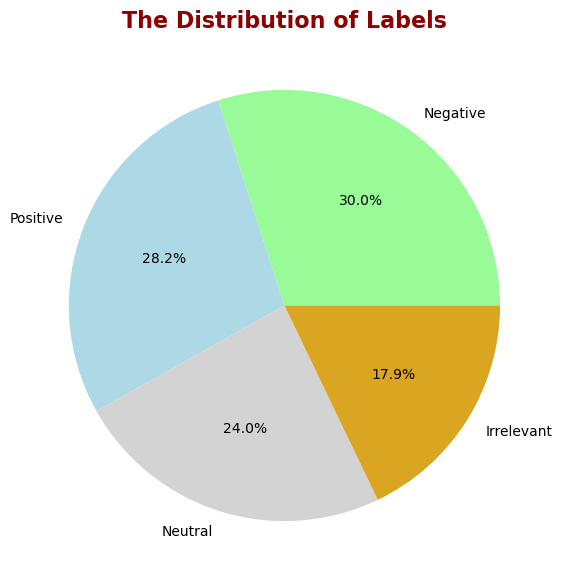

In [77]:
# Calculate percentages
percentages = (df['Emotion'].value_counts() / df['Emotion'].count()) * 100

# Configure plot
plt.figure(figsize=(7, 7))
plt.pie(
    percentages, 
    labels=df['Emotion'].value_counts().index,  # Ensure labels match the order of counts
    colors=['#98FB98', '#ADD8E6', 'LightGrey', '#DAA520'], 
    autopct='%1.1f%%'  # Format percentages to 1 decimal place
)
plt.title('The Distribution of Labels', color='#8B0000', fontsize=16, fontweight='bold')
plt.show()

In [79]:
import random
# ANSI color codes
color_codes = {
    "blue": 34,"green": 32,"red": 31,"purple": 35,"orange": 33,"yellow": 33,"pink": 35,"brown": 33,"gray": 37}
for i in range(0, len(df), 7):  # Loop through the DataFrame with a step of 7
    color = random.choice(list(color_codes.values()))  # Randomly select a color code
    print(f"\033[1;{color}mThe comment is: {df['Comment'][i]}\033[0m")  # Print the comment
    print(f"\033[1;{color}mIts Label is: {df['Emotion'][i]}\033[0m\n")  # Print its label
    if i > 30:  # Break the loop after 30 comments to prevent excessive output
        break


The comment is: I am freddy and i despise dota 2  -  Casey
Its Label is: Negative

The comment is: Did you guys play heartstone? because I'm obsessed and feel like I'm cheating on wasps
Its Label is: Positive

The comment is: I want to be gta v Fashion so bad
Its Label is: Positive

The comment is: I haven't even activated my service yet and am about to cancel this @ Verizon sh * t.
Its Label is: Negative

The comment is: Competitive high-profile players did not spoil the game, but Fanites "inability to make a pass and competitive two different games spoiled the game. Any other comp game is designed for both audiences, such as CS: GO with its limited cards / downloads.
Its Label is: Negative

The comment is: @ benniteGame we need to fix these crashes our game is crazy on PC and say app hung wtf continues!!
Its Label is: Negative



In [81]:
import spacy


In [83]:
nlp = spacy.load("en_core_web_sm")


In [85]:
doc=df['Comment'][1000]
doc


'Huge leak. I wonder so Sony will react to this?'

In [87]:
txt=nlp(doc)
txt

Huge leak. I wonder so Sony will react to this?

In [89]:
for token in txt:
    print(token)


Huge
leak
.
I
wonder
so
Sony
will
react
to
this
?


In [91]:
for token in txt:
    print(f"Word: {token} -> {token.lemma_}")

Word: Huge -> huge
Word: leak -> leak
Word: . -> .
Word: I -> I
Word: wonder -> wonder
Word: so -> so
Word: Sony -> Sony
Word: will -> will
Word: react -> react
Word: to -> to
Word: this -> this
Word: ? -> ?


In [93]:
for token in txt:
    if token.is_stop:
        print(token)

I
so
will
to
this


In [103]:
def processing(txt):
    preprocess_txt=[]
    doc=nlp(txt)
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        preprocess_txt.append(token.lemma_)
    return " ".join(preprocess_txt)
print(doc)
process_doc=processing(doc)
print("\n",process_doc)

Huge leak. I wonder so Sony will react to this?

 huge leak wonder Sony react


In [105]:
df['preprocess_comment']=df['Comment'].apply(processing)


In [107]:
df['num_emotion']=df['Emotion'].map({'Negative':0,'Positive':1,'Neutral':2, 'Irrelevant' : 3})
df.head()


,Comment,Emotion,preprocess_comment,num_emotion
0,I am freddy and i despise dota 2 - Casey,Negative,freddy despise dota 2 casey,0
1,No skull and bones no beyond good & evil 2... ...,Positive,skull bone good evil 2 shit dog far cry assass...,1
2,This is literally stupid a company that’s wort...,Negative,literally stupid company worth billion petty u...,0
3,Team JerseyBoys is now also represented on Twi...,Neutral,Team JerseyBoys represent Twitch welcome @chuc...,2
4,i dont not even feel like this playing fucking...,Negative,not feel like play fucking league team legend,0


In [109]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df['preprocess_comment'],df['num_emotion'],test_size=0.2
,random_state=42,stratify=df['num_emotion'])

In [111]:
from sklearn.feature_extraction.text import TfidfVectorizer
TF=TfidfVectorizer()
x_train_tf=TF.fit_transform(x_train)
x_test_tf=TF.transform(x_test)

In [113]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train_tf,y_train)
ypred=rf.predict(x_test_tf)

In [114]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,ConfusionMatrixDisplay
print(accuracy_score(y_test,ypred))


0.6550680786686838


In [115]:
print(confusion_matrix(y_test, ypred))

[[460  56  61  17]
 [ 75 410  67   7]
 [ 83  74 304  15]
 [ 71  87  71 125]]


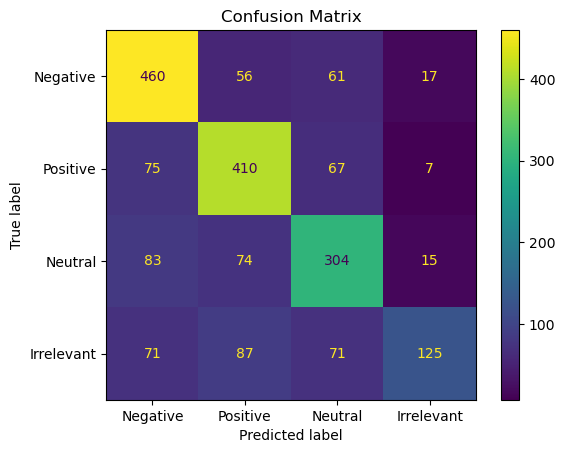

In [116]:
label_names = {'Negative': 0, 'Positive': 1, 'Neutral': 2, 'Irrelevant': 3}
cm_display = ConfusionMatrixDisplay.from_predictions(y_test, ypred, display_labels=label_names.keys())
#cm_display.plot(cmap='Blues', xticks_rotation=45)
plt.title('Confusion Matrix')
plt.show()

In [121]:
from sklearn.metrics import classification_report
label_names = {'Negative': 0, 'Positive': 1, 'Neutral': 2, 'Irrelevant': 3}
report = classification_report(y_test, ypred, target_names=label_names.keys())
print(report)


              precision    recall  f1-score   support

    Negative       0.67      0.77      0.72       594
    Positive       0.65      0.73      0.69       559
     Neutral       0.60      0.64      0.62       476
  Irrelevant       0.76      0.35      0.48       354

    accuracy                           0.66      1983
   macro avg       0.67      0.62      0.63      1983
weighted avg       0.67      0.66      0.64      1983



In [129]:
pip install prettytable

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [131]:
from sklearn.metrics import classification_report
from prettytable import PrettyTable
label_names = {'Negative': 0, 'Positive': 1, 'Neutral': 2, 'Irrelevant': 3}
report = classification_report(y_test, ypred, target_names=label_names.keys(), output_dict=True)
table = PrettyTable()
# Set the header of the table
table.field_names = ["Class", "Precision", "Recall", "F1-score", "Support"]
for class_name, metrics in report.items():
    if isinstance(metrics, dict):
        row = [class_name, metrics['precision'], metrics['recall'], metrics['f1-score'], metrics['support']]
        table.add_row(row)
print(table.get_string(style="BLUE"))


+--------------+--------------------+--------------------+--------------------+---------+
|    Class     |     Precision      |       Recall       |      F1-score      | Support |
+--------------+--------------------+--------------------+--------------------+---------+
|   Negative   | 0.6676342525399129 | 0.7744107744107744 | 0.7170693686671863 |  594.0  |
|   Positive   | 0.6539074960127592 | 0.7334525939177102 | 0.6913996627318718 |  559.0  |
|   Neutral    | 0.6043737574552683 | 0.6386554621848739 | 0.6210418794688458 |  476.0  |
|  Irrelevant  | 0.7621951219512195 | 0.3531073446327684 | 0.4826254826254826 |  354.0  |
|  macro avg   | 0.6720276569897901 | 0.6249065437865318 | 0.6280340983733467 |  1983.0 |
| weighted avg | 0.6654604225916692 | 0.6550680786686838 | 0.6449303943177087 |  1983.0 |
+--------------+--------------------+--------------------+--------------------+---------+


In [133]:
X = df['preprocess_comment']
y = df['Emotion']


In [135]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [137]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y


array([1, 3, 1, ..., 1, 2, 0])

In [139]:
from sklearn.svm import SVC
param_grid = {'kernel': ['rbf'],
'C': [0.1, 1, 10, 15],
'random_state':[42]}
svc = SVC()


In [141]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(svc, param_grid, cv=10)
grid_search.fit(X, y)


GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 15], 'kernel': ['rbf'],
                         'random_state': [42]})

In [142]:
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)
print(f"Best model Accuracy Score is :{grid_search.best_score_}")

Best hyperparameters: {'C': 10, 'kernel': 'rbf', 'random_state': 42}
Best model Accuracy Score is :0.7084218653364148


In [143]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X)
y_pred

array([1, 3, 1, ..., 1, 2, 0])

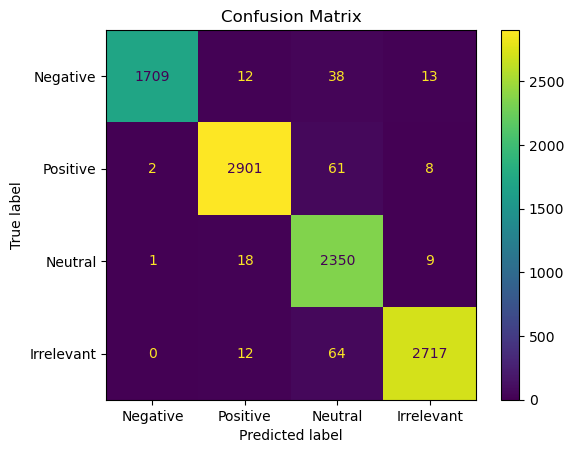

In [144]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,ConfusionMatrixDisplay
label_names = {'Negative': 0, 'Positive': 1, 'Neutral': 2, 'Irrelevant': 3}
cm_display = ConfusionMatrixDisplay.from_predictions(y, y_pred, display_labels=label_names.keys())
plt.title('Confusion Matrix')
plt.show()